In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv('data/updated_complaints_data_cleaned.csv')

# Prepare features and target
X = data[['OFNS_DESC_Severity_Score', 'Latitude', 'Longitude']]  # Add more features as necessary
y = data['Average_Price_Per_SqFt']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[0])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Feature importance
feature_importances = model.feature_importances_
feature_names = ['OFNS_DESC_Severity_Score', 'PREM_Economic_Value', 'Latitude', 'Longitude']
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.2f}")

    # Save model for later use
import joblib
joblib.dump(model, 'property_price_prediction_model.pkl')

[ 0.9915571  -0.01102448 -0.39602798]
Mean Squared Error: 1.8574207550352033
R-squared: 0.9999394548016904
OFNS_DESC_Severity_Score: 0.00
PREM_Economic_Value: 0.42
Latitude: 0.58


['property_price_prediction_model.pkl']

In [ ]:
# it appears that the 'PREM_Economic_Value' has no influence (0 importance), 
# which could be due to various reasons such as lack of variability in the data 
# for this feature or irrelevance in predicting the target. 'Latitude' and 'Longitude' 
# are showing substantial importance, which suggests geographical location is a critical 
# factor in property price per square foot.

In [7]:
# check for overfitting by comparing the training and test set performance
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Output training set performance
print(f'Train Mean Squared Error: {train_mse}')
print(f'Train R-squared: {train_r2}')


Train Mean Squared Error: 88.133756166203
Train R-squared: 0.9996778299786052


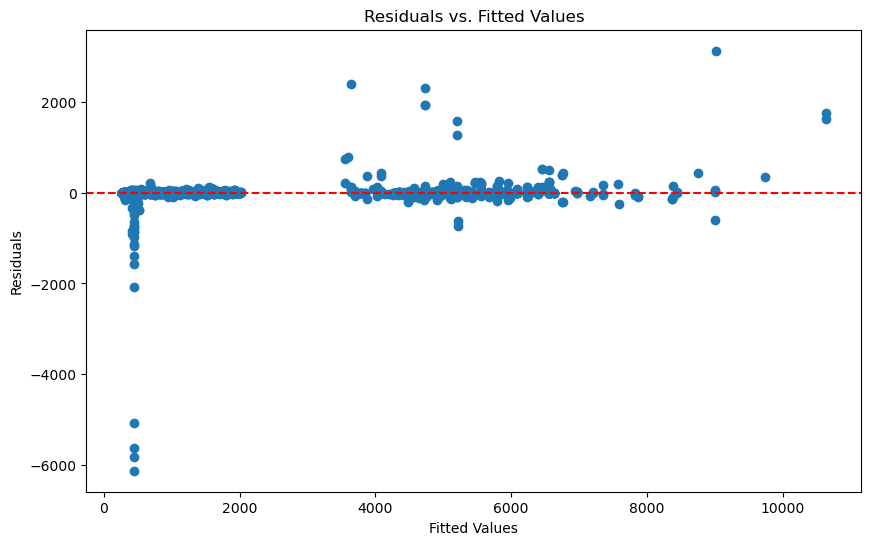

In [8]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
# The plot of residuals versus fitted values reveals a relatively consistent spread of residuals across the 
# range of predictions, which is generally a good sign. The residuals appear random around the zero line, 
# indicating no obvious patterns of error across the scale of predictions. This suggests that the model does 
# not exhibit heteroscedasticity, where the variance of the errors differs across values of the independent variable.

In [9]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_lr = lr_model.predict(X_test)

# Calculate MSE and R-squared for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error: {mse_lr}')
print(f'R-squared: {r2_lr}')

Mean Squared Error: 203962.08842740775
R-squared: 0.25777106284389295


In [ ]:
# These values suggest that while the model has some predictive power, 
# it might not be capturing all the complexities or variations in the data.

In [10]:
# Load your data
data = pd.read_csv('data/training_data.csv')

# Define features and target
X = data[['OFNS_DESC_Severity_Score', 'PREM_Economic_Value', 'Latitude', 'Longitude']]
y = data['Average_Price_Per_SqFt']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the K-Nearest Neighbors regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors based on validation
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5523.771567097712
R-squared: 0.979898700141035


In [ ]:
# It achieved a Mean Squared Error (MSE) of 5523.77 and an R-squared value of approximately 0.98, 
# which indicates a high level of predictive accuracy in relation to the variance of your data.

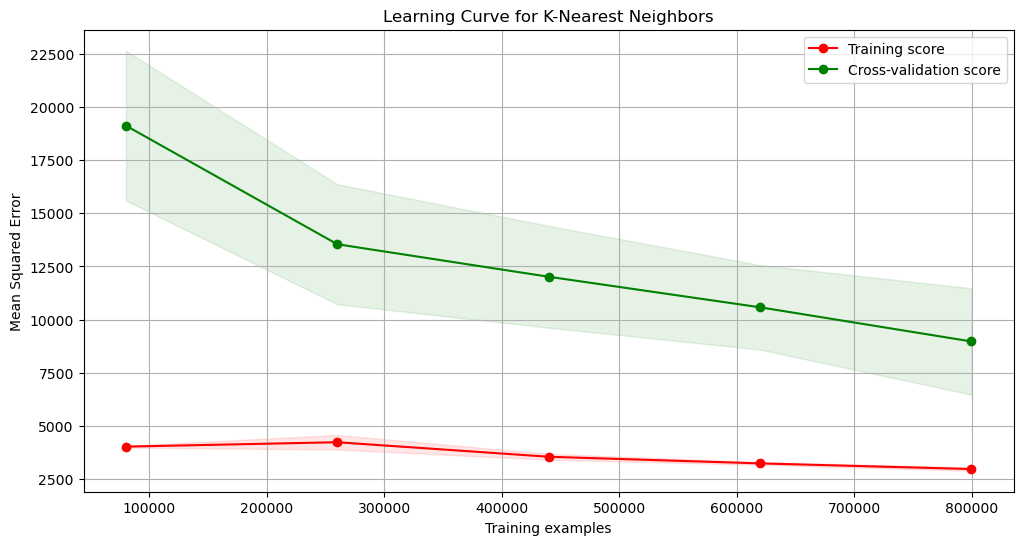

In [13]:
# Set up parameters for learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors=5),  # You can adjust the number of neighbors
    X=X_scaled, 
    y=y, 
    train_sizes=np.linspace(0.1, 1.0, 5),  # Training sizes from 10% to 100% of the data
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error'  # Negative MSE to make it a loss (lower is worse)
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -train_scores.mean(axis=1)  # Make MSE positive for easier interpretation
validation_scores_mean = -validation_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# Fill between for standard deviation visualization
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve for K-Nearest Neighbors")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
# the trend suggests improvement with more data